In [2]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [7]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.columns = ['labels', 'data']
df['b_labels'] = df['labels'].map({'ham' : 0, 'spam' : 1})
Y = df['b_labels'].as_matrix()

count_vectorizer = CountVectorizer(decode_error = 'ignore')
X = count_vectorizer.fit_transform(df['data'])

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.33)

D:\AI\Python\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [8]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print('train score : ', model.score(Xtrain, Ytrain))
print('test score : ', model.score(Xtest, Ytest))

train score :  0.994106616662202
test score :  0.9825992387166939


In [12]:
def visualize(label) :
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

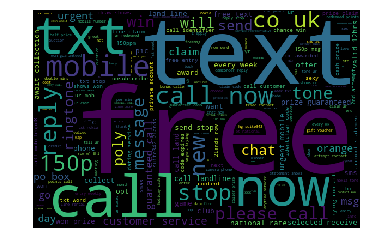

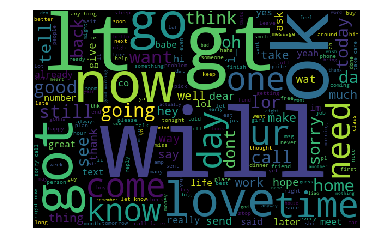

In [13]:
visualize('spam')
visualize('ham')

In [14]:
df['predictions'] = model.predict(X)
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam :
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Bewa

In [ ]:
should_not_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in sneaky_spam :
    print(msg)